In [50]:
import numpy as np 
import pandas as pd 
from keras import layers ,optimizers
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2
import keras
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Conv2D, MaxPooling2D, Flatten, InputLayer,Activation ,Dropout
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import plot_model
import matplotlib.image as mpimg
import os
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from keras.applications.vgg16 import VGG16 

In [2]:
path= 'UTKFace'

In [3]:
os.chdir(path)
file_list = os.listdir() #Go path and list files

In [4]:
file_list

['9_1_2_20161219204347420.jpg.chip.jpg',
 '36_0_1_20170117163203851.jpg.chip.jpg',
 '86_1_0_20170120225751953.jpg.chip.jpg',
 '26_1_0_20170116171048641.jpg.chip.jpg',
 '1_1_2_20161219154612988.jpg.chip.jpg',
 '52_0_1_20170117161018159.jpg.chip.jpg',
 '25_1_0_20170117134403373.jpg.chip.jpg',
 '16_0_0_20170104003740977.jpg.chip.jpg',
 '27_0_3_20170119210058457.jpg.chip.jpg',
 '36_0_3_20170119180245724.jpg.chip.jpg',
 '58_0_2_20170116193704928.jpg.chip.jpg',
 '6_1_0_20170114024512634.jpg.chip.jpg',
 '35_1_2_20170116185947151.jpg.chip.jpg',
 '1_1_3_20161219230734016.jpg.chip.jpg',
 '26_1_1_20170103181931657.jpg.chip.jpg',
 '2_0_2_20161219141650121.jpg.chip.jpg',
 '53_1_0_20170110143534851.jpg.chip.jpg',
 '35_0_3_20170119201304861.jpg.chip.jpg',
 '23_1_0_20170117142807780.jpg.chip.jpg',
 '24_0_3_20170119152239904.jpg.chip.jpg',
 '26_1_2_20170116182434267.jpg.chip.jpg',
 '75_0_0_20170117204739711.jpg.chip.jpg',
 '36_1_4_20170104172843788.jpg.chip.jpg',
 '23_1_0_20170116222839270.jpg.chip.jpg

In [5]:
print("Number Of İmages: ", len(file_list))

Number Of İmages:  23708


In [6]:
## Age
age = []
for i in file_list:
    if int(i.split("_")[0])<=10:
        age.append(0)
    elif int(i.split("_")[0])> 10 and int(i.split("_")[0]) <=15:
        age.append(1)
    elif int(i.split("_")[0])> 15 and int(i.split("_")[0]) <=25:
        age.append(2)
    elif int(i.split("_")[0])> 25 and int(i.split("_")[0]) <=35:
        age.append(3)
    elif int(i.split("_")[0])> 35 and int(i.split("_")[0]) <=45:
        age.append(4)
    elif int(i.split("_")[0])> 45 and int(i.split("_")[0]) <=55:
        age.append(5)
    elif int(i.split("_")[0])> 55 and int(i.split("_")[0]) <=65:
        age.append(6)
    else:
        age.append(7)

    
age_labels = ["0-10","11-15","16-25","26-35","36-45","46-55","56-65",">65"]

age = np.array(age)

print(age.shape)


(23708,)


In [7]:
## Gender
gender=[]
for i in file_list:
    if int(i.split("_")[1])==0:
        gender.append(0)
    elif int(i.split("_")[1])==1:
        gender.append(1)
        
gender_labels = ["0","1"]
gender = np.array(gender)
print(gender.shape)

(23708,)


In [8]:
image=[]
for file in file_list:
    img= cv2.imread(file)
    img=cv2.resize(img,dsize = (128,128)) # (200,200)--->(48,48)
    img=cv2.cvtColor((img), cv2.COLOR_BGR2RGB)
    image.append(img)
image= np.array(image)
print("images shape: ",image.shape)

images shape:  (23708, 128, 128, 3)


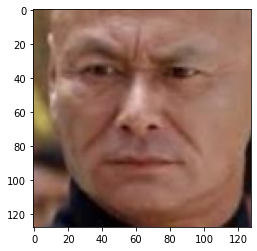

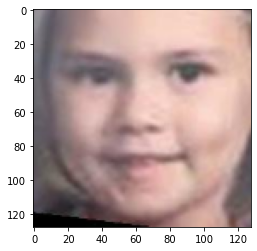

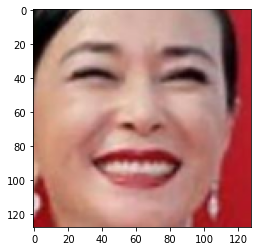

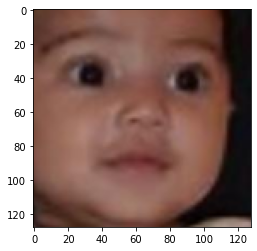

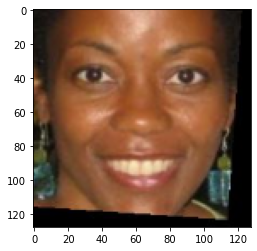

In [9]:
for i in range(5):
    plt.imshow(image[i+10])
    plt.show()

In [10]:
#normalization # pixel scaling
image=np.array(image)/255.0

In [11]:
image.shape

(23708, 128, 128, 3)

## Split Data for modeing

In [89]:
x=image
y=age

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True, random_state=42)
x_train, x_val, y_train, y_val= train_test_split(x_train, y_train , test_size = .2, random_state= 42)

In [94]:
x_train.shape

(15172, 128, 128, 3)

In [98]:
x_val.shape

(3794, 128, 128, 3)

In [99]:
sample,x,y,dim=x_train.shape
x_train_re=x_train.reshape(sample, x*y*dim)


In [100]:
sample,x,y,dim=x_val.shape
x_val_re=x_val.reshape(sample, x*y*dim)

In [55]:
y_train.shape

(15172,)

In [57]:
y_val.shape

(3794,)

## Logistic Regression model

In [104]:
def score(X_train_f, X_val_f, y_train_f, y_val_f):
    models = [LogisticRegression()]
    models_names= ['LogisticRegression']
    i=0
    for model in models:
        mod= OneVsRestClassifier(model).fit(X_train_f, y_train_f)
        t_score=mod.score(X_train_f, y_train_f)
        v_score=mod.score(X_val_f, y_val_f)
        print('Training accuracy score in {0} {1:.3f}'.format(models_names[i],t_score))
        print('Validation accuracy score in {0} {1:.3f}'.format(models_names[i],v_score))
        print()
    

In [105]:
score(x_train_re, x_val_re, y_train, y_val)

/Users/eman./opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/eman./opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

Training accuracy score in LogisticRegression 0.623
Validation accuracy score in LogisticRegression 0.485



## Simple Neural Network model (NN)

In [106]:
simple_model = Sequential()
simple_model.add(Dense(512, input_shape = x_train_re.shape[1:])),
simple_model.add(Dense(128,activation='relu')),
simple_model.add(Dense(64,activation='relu')),
simple_model.add(Dense(45,activation='tanh')),
simple_model.add(Dense(20,activation='relu')),
simple_model.add(Dense(8,activation='softmax')),

simple_model.summary()



Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 512)               25166336  
                                                                 
 dense_80 (Dense)            (None, 128)               65664     
                                                                 
 dense_81 (Dense)            (None, 64)                8256      
                                                                 
 dense_82 (Dense)            (None, 45)                2925      
                                                                 
 dense_83 (Dense)            (None, 20)                920       
                                                                 
 dense_84 (Dense)            (None, 8)                 168       
                                                                 
Total params: 25,244,269
Trainable params: 25,244,269

In [107]:
simple_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [108]:
simple_model.fit(x_train_re,
                 y_train,
                 validation_data=(x_val_re,y_val),
                 epochs=10,
                 batch_size= 256)

Epoch 1/10
60/60 [==============================] - 15s 206ms/step - loss: 1.9281 - accuracy: 0.2927 - val_loss: 1.8956 - val_accuracy: 0.3060
Epoch 2/10
60/60 [==============================] - 8s 128ms/step - loss: 1.8819 - accuracy: 0.3177 - val_loss: 1.8936 - val_accuracy: 0.3060
Epoch 3/10
60/60 [==============================] - 8s 138ms/step - loss: 1.8815 - accuracy: 0.3177 - val_loss: 1.8941 - val_accuracy: 0.3060
Epoch 4/10
60/60 [==============================] - 8s 137ms/step - loss: 1.8811 - accuracy: 0.3177 - val_loss: 1.8938 - val_accuracy: 0.3060
Epoch 5/10
60/60 [==============================] - 9s 143ms/step - loss: 1.8811 - accuracy: 0.3177 - val_loss: 1.8945 - val_accuracy: 0.3060
Epoch 6/10
60/60 [==============================] - 8s 133ms/step - loss: 1.8812 - accuracy: 0.3177 - val_loss: 1.8941 - val_accuracy: 0.3060
Epoch 7/10
60/60 [==============================] - 8s 129ms/step - loss: 1.8814 - accuracy: 0.3177 - val_loss: 1.8944 - val_accuracy: 0.3060
Epoch

In [27]:
predict_x1 = simple_model.predict(x_train_re)
classes_x1 = np.argmax(predict_x1, axis=1)
print("Train accuracy: ",accuracy_score(y_train, classes_x1))
print("\n")
predict_x = simple_model.predict(x_val_re)
classes_x = np.argmax(predict_x, axis=1)
print("Val accuracy: ",accuracy_score(y_val, classes_x))

Train accuracy:  0.31769048246770365


Val accuracy:  0.3060094886663152


## CNN

In [109]:
print("x_train shape:",x_train.shape)
print("x_val shape:",x_val.shape)

#one hot encoding
y_train= to_categorical(y_train,num_classes=8)
y_val= to_categorical(y_val,num_classes=8) 


print("y_train shape: ",y_train.shape)
print("y_val shape: ",y_val.shape)


x_train shape: (15172, 128, 128, 3)
x_val shape: (3794, 128, 128, 3)
y_train shape:  (15172, 8)
y_val shape:  (3794, 8)


In [110]:
CNN = Sequential()
CNN.add(Conv2D(100, kernel_size = 3, activation = 'relu', input_shape = (128,128,3)))
CNN.add(Conv2D(filters=16,kernel_size=3, activation='relu', padding='same')),
CNN.add(MaxPooling2D()),
CNN.add(Conv2D(filters=32,kernel_size=3, activation='relu', padding='same')),
CNN.add(MaxPooling2D()),
CNN.add(Flatten()),
CNN.add(Dense(20,activation='relu')),
CNN.add(Dense(30,activation='relu')),
CNN.add(Dense(20,activation='relu')),
CNN.add(Dense(8,activation='softmax'))


CNN.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [111]:
CNN.fit(x_train, y_train, epochs=10, verbose=1, validation_split=.25)

Epoch 1/10
356/356 [==============================] - 289s 809ms/step - loss: 1.8349 - accuracy: 0.3299 - val_loss: 1.5885 - val_accuracy: 0.4226
Epoch 2/10
356/356 [==============================] - 278s 781ms/step - loss: 1.4485 - accuracy: 0.4405 - val_loss: 1.3107 - val_accuracy: 0.4827
Epoch 3/10
356/356 [==============================] - 275s 773ms/step - loss: 1.2248 - accuracy: 0.5078 - val_loss: 1.2314 - val_accuracy: 0.5044
Epoch 4/10
356/356 [==============================] - 280s 786ms/step - loss: 1.1146 - accuracy: 0.5448 - val_loss: 1.1994 - val_accuracy: 0.5128
Epoch 5/10
356/356 [==============================] - 277s 777ms/step - loss: 1.0250 - accuracy: 0.5762 - val_loss: 1.1880 - val_accuracy: 0.5247
Epoch 6/10
356/356 [==============================] - 278s 780ms/step - loss: 0.9409 - accuracy: 0.6076 - val_loss: 1.1782 - val_accuracy: 0.5247
Epoch 7/10
325/356 [==========================>...] - ETA: 22s - loss: 0.8392 - accuracy: 0.6560

KeyboardInterrupt: 

In [47]:
predict_x2=np.argmax(y_train,axis=1)
classes_x2 = np.argmax(CNN.predict(x_train),axis=1)
print('train accuracy: ')
print(accuracy_score(predict_x2, classes_x2))


predict_x3=np.argmax(y_val,axis=1)
classes_x3 = np.argmax(CNN.predict(x_val),axis=1)
print("\n")
print('val accuracy: ')
print(accuracy_score(predict_x3, classes_x3))

train accuracy: 
0.7170445557606117


val accuracy: 
0.5063257775434897


In [ ]:
## optimize the model

In [51]:
model = Sequential()
model.add(Conv2D(100, kernel_size = 3, activation = 'relu', input_shape = (128,128,3)))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(32, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(40, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(25,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation = 'softmax'))
print(model.summary())

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs =10 ,batch_size = 64)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 126, 126, 100)     2800      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 63, 63, 100)      0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 61, 61, 32)        28832     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 14, 14, 64)     

## Transfer learning
### CNN with Pre-trained model( VVG16)

In [65]:
input_shape= x_train.shape[1:]
vgg= VGG16(include_top= False,weights="imagenet",input_shape=input_shape)

In [70]:
model= Sequential() #I create my model

for layer in vgg.layers: 
    model.add(layer)        # I transfer vgg layers to my model

for layer in model.layers:
    layer.trainable= False  #I'll use vgg16 weights so trainable=False

model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(8, activation="softmax"))

print(model.summary())

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 32, 32, 256)     

In [71]:
model.compile(loss="categorical_crossentropy",optimizer="adam" ,metrics=["accuracy"])


In [72]:
model.fit(x_train, y_train, epochs=10, verbose=1, validation_split=.25)

Epoch 1/10
356/356 [==============================] - 630s 2s/step - loss: 1.7748 - accuracy: 0.3433 - val_loss: 1.4126 - val_accuracy: 0.4669
Epoch 2/10
356/356 [==============================] - 751s 2s/step - loss: 1.4728 - accuracy: 0.4362 - val_loss: 1.3270 - val_accuracy: 0.4922
Epoch 3/10
356/356 [==============================] - 660s 2s/step - loss: 1.4010 - accuracy: 0.4536 - val_loss: 1.2695 - val_accuracy: 0.4946
Epoch 4/10
356/356 [==============================] - 641s 2s/step - loss: 1.3604 - accuracy: 0.4677 - val_loss: 1.2702 - val_accuracy: 0.4946
Epoch 5/10
356/356 [==============================] - 579s 2s/step - loss: 1.3251 - accuracy: 0.4788 - val_loss: 1.2736 - val_accuracy: 0.4906
Epoch 6/10
356/356 [==============================] - 517s 1s/step - loss: 1.2905 - accuracy: 0.4819 - val_loss: 1.2348 - val_accuracy: 0.5107
Epoch 7/10
356/356 [==============================] - 515s 1s/step - loss: 1.2798 - accuracy: 0.4846 - val_loss: 1.2678 - val_accuracy: 0.5041

In [52]:
# plot_model(model, to_file='model.png')
# img = mpimg.imread('model.png')

# plt.figure(figsize=(35, 30))
# plt.imshow(img)